<a href="https://colab.research.google.com/github/Shwetank-Chaudhary/Youtube-Adview/blob/main/YouTube_Adview_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Libraries 

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train=pd.read_csv("https://raw.githubusercontent.com/Shwetank-Chaudhary/Youtube-Adview/main/training%20data.csv")

In [55]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [56]:
train.shape

(14999, 9)

In [57]:
train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

# Preprocessing


In [58]:
l=['likes','dislikes','comment','views']
for i in l:
  train=train[train[i]!='F']
  train[i]=pd.to_numeric(train[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
train['published']=LabelEncoder().fit_transform(train['published'])
train['category']=LabelEncoder().fit_transform(train['category'])
train.shape

(14637, 9)

# Time to Sec

In [61]:
def sec(x):
  x=x[2:]
  p=['H','M','S']
  h=''
  m=''
  s=''
  value=''
  for i in x:
    if i not in p:
      value+=i
    else:
      if i=='H':
        h=value
      elif i=='M':
        m=value
      elif i=='S':
        s=value
      value=''
  if h=='':
    h='0'
  if m=='':
    m='0'
  if s=='':
    s='0'
  time=int(h)*3600+int(m)*60+int(s)
  return time

In [62]:
t=train['duration'].apply(sec)

In [63]:
train['duration']=t

In [64]:
vid=train.vidid

In [65]:
train.drop('vidid',inplace=True,axis=1)

# Visualisation

In [66]:
train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,5
1,2,1707,56,2,6,2185,570,3
2,1,2023,25,0,2,2094,136,2
3,6,620860,777,161,153,2119,262,7
4,1,666,1,0,0,2091,31,3


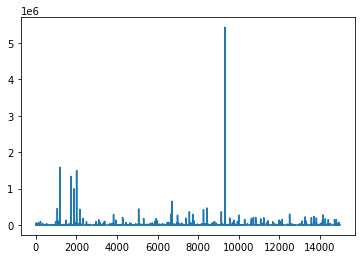

In [67]:
plt.plot(train['adview'])

In [68]:
train=train[train['adview']<2000000]

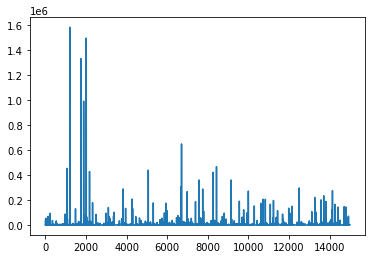

In [69]:
plt.plot(train['adview'])

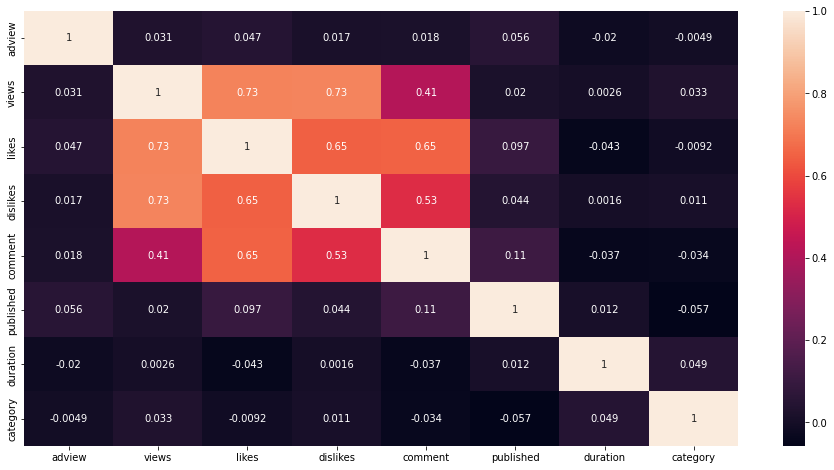

In [70]:
plt.figure(figsize=[16,8])
sns.heatmap(train.corr(),annot=True)

In [71]:
f=['views','likes','dislikes','comment','published','duration','category']

# Spliting Data

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x=train[f]
y=train['adview']

In [74]:
y.shape

(14636,)

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

# Scaling Data

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
l=list(x.columns)

In [78]:
x_train=pd.DataFrame(MinMaxScaler().fit_transform(x_train),columns=l)
x_test=pd.DataFrame(MinMaxScaler().fit_transform(x_test),columns=l)

# Model Evaluation


In [79]:
from sklearn import metrics

In [80]:
def evaluate(model,x_test,y_test):
  pred=model.predict(x_test)
  print("Mean Absolute Value: ",metrics.mean_absolute_error(y_test,pred))
  print("Mean Squared Value: ",metrics.mean_squared_error(y_test,pred))


# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression().fit(x_train,y_train)
evaluate(lr_model,x_test,y_test)

Mean Absolute Value:  3707.378005824535
Mean Squared Value:  835663131.1210337


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression().fit(x_train,y_train)
evaluate(lg_model,x_test,y_test)

# SVM

In [83]:
from sklearn.svm import SVR
svr=SVR().fit(x_train,y_train)
evaluate(svr,x_test,y_test)

Mean Absolute Value:  1696.9438599505638
Mean Squared Value:  833685776.029172


# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor().fit(x_train,y_train)
evaluate(dtr,x_test,y_test)

Mean Absolute Value:  2673.399931693989
Mean Squared Value:  892699281.2407787


# Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor().fit(x_train,y_train)
evaluate(rfr,x_test,y_test)

Mean Absolute Value:  3021.6219023224044
Mean Squared Value:  497506672.26866776


**Select the model with least error for test dataset**